In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 

In [2]:
#!pip install --upgrade uproot
import uproot

uproot.version.version

'4.2.2'

In [3]:
file = '/home/user/geant4-apps/absorber-build/output/output.root'
branches = ["edep", "weight"]
df = uproot.open(file)['edep'].arrays(branches, library='pd')

df.head(10)

edep  weight
0  295.005685     1.0
1  662.000000     1.0
2  662.000000     1.0
3  662.000000     1.0
4  662.000000     1.0
5  427.158961     1.0
6  264.787174     1.0
7  662.000000     1.0
8  423.609678     1.0
9  662.000000     1.0

In [4]:
df.describe()

edep   weight
count  74283.000000  74283.0
mean     485.617313      1.0
std      224.358215      0.0
min        0.012955      1.0
25%      293.241559      1.0
50%      662.000000      1.0
75%      662.000000      1.0
max      662.000000      1.0

In [10]:
import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 28}
matplotlib.rc('font', **font)

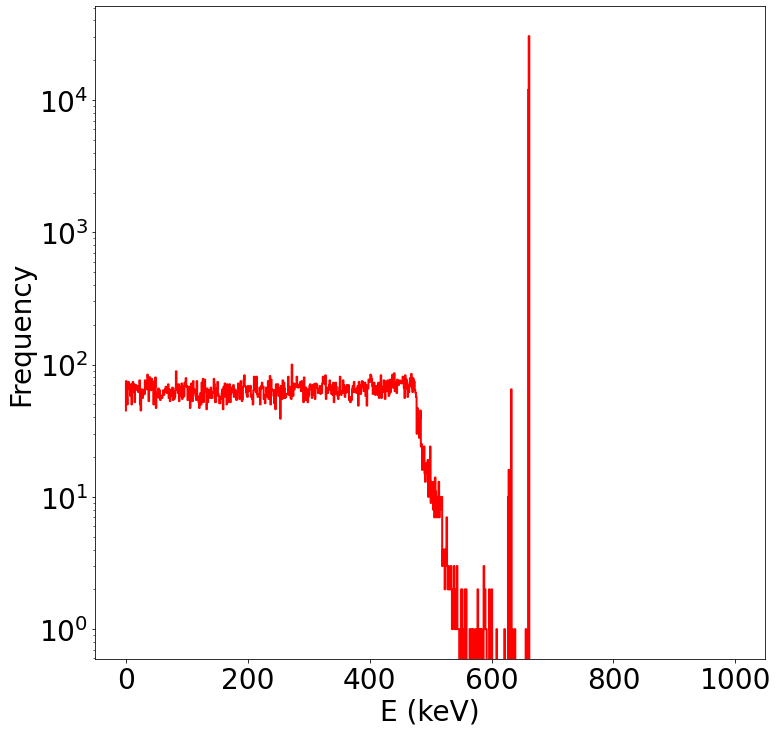

In [11]:
E = df['edep'] #keV
W = df["weight"]

varMin = 0.
varMax = 1000
nbin = 1000

#plt.figure(figsize=(12, 12))
#plt.hist(E, range=[varMin,varMax], bins = nbin, weights=W,
         #edgecolor='black', linewidth=1.2)
#plt.xlabel("E (keV)")
#plt.ylabel("Frequency")
#plt.yscale('log')
#plt.show()

Dvar = (varMax-varMin)/nbin
#edges = varMin:Dvar:varMax
#edges = np.arange(varMin,varMax,Dvar)
h1, edges = np.histogram(E, range=[varMin,varMax], bins=nbin, weights=W)

edges = edges[:-1]
Ec = edges + Dvar*0.5

plt.figure(figsize=(12, 12))
plt.step(edges, h1, where='pre', color='red', linestyle='solid', linewidth=2)
plt.title("")
plt.xlabel("E (keV)")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()